In [8]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [3]:
from __future__ import absolute_import
import helpers

from costs import compute_mse, compute_rmse

def ridge_regression(y, tx, lamb):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    # Hes = tx.T * tx + 2*N*lambda * I_m
    G = np.eye(tx.shape[1])
    G[0, 0] = 0
    hes = np.dot(tx.T, tx) + lamb * G
    weight = np.linalg.solve(hes, np.dot(tx.T, y))
    mse = compute_mse(y, tx, weight)
    return mse, weight

from build_polynomial import build_poly
from plots import cross_validation_visualization

In [4]:
# load dataset

x, y = helpers.load_data()

/home/kyu/Dropbox/EPFL/2016-2017Sem1/PRML/lab/ML_course/labs/ex04/template/dataEx3.csv


In [5]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [18]:
def cross_validation(y, x, k_indices, k, lamb, degree, rmse=False):
    """return the loss of ridge regression."""
    # ***************************************************
    # Split data into K groups according to indices
    # get k'th subgroup in test, others in train:
    # ***************************************************
    x = np.array(x)
    y = np.array(y)

    train_ind = np.concatenate((k_indices[:k], k_indices[k+1:]), axis=0)
    train_ind = np.reshape(train_ind, (train_ind.size,))

    test_ind = k_indices[k]
    # Note: different from np.ndarray, tuple is name[index,]
    # ndarray is name[index,:]
    train_x = x[train_ind,]
    train_y = y[train_ind,]
    test_x = x[test_ind,]
    test_y = y[test_ind,]

    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree:
    # ***************************************************
    train_x = build_poly(train_x, degree)
    test_x = build_poly(test_x, degree)

    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression:
    # ***************************************************
    loss_tr, weight = ridge_regression(train_y, train_x, lamb)

    # Test with sklearn ridge solve.
#     clf = linear_model.ridge_regression(train_x, train_y, alpha=lamb)
    # weight = clf

    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    ''' Compute MSE by ridge weights '''
    loss_tr = compute_mse(train_y, train_x, weight)
    loss_te = compute_mse(test_y, test_x, weight)
    # loss_tr = compute_mse(train_y, train_x, weight)
    # loss_te = compute_mse(test_y, test_x, weight)

    if rmse is True:
        loss_tr = compute_rmse(loss_tr)
        loss_te = compute_rmse(loss_te)
    return loss_tr, loss_te

[0.2463628441522478, 0.24639438591167401, 0.24645941110276431, 0.24658005338575609, 0.24677578124864258, 0.24704739127521619, 0.24736716366662131, 0.24768951562092667, 0.24797475941004027, 0.24820503327586749, 0.24838503221556793, 0.24853562755481065, 0.24868802498781456, 0.24887783432222546, 0.2491344535723842, 0.24946908719898742, 0.24987875785040009, 0.25038021830066681, 0.25106323379008938, 0.25213449970220098, 0.25390868608827477, 0.25668538320877454, 0.26051333181597341, 0.26502756818150064, 0.26958300093355009, 0.27359572573669211, 0.27677542367488595, 0.27912117803359432, 0.28079614680366749, 0.28200952807641783] [0.30794677069151549, 0.30700329490908962, 0.30577806845866173, 0.30433857987019397, 0.30284965988225671, 0.30151720709125496, 0.30047667090943508, 0.29972396235081072, 0.29914500761080542, 0.29858948174603678, 0.29792086139559132, 0.29703668083981299, 0.29588598916694331, 0.29449858769737425, 0.29300998188696631, 0.29165011114761408, 0.29069675514776411, 0.29045102376

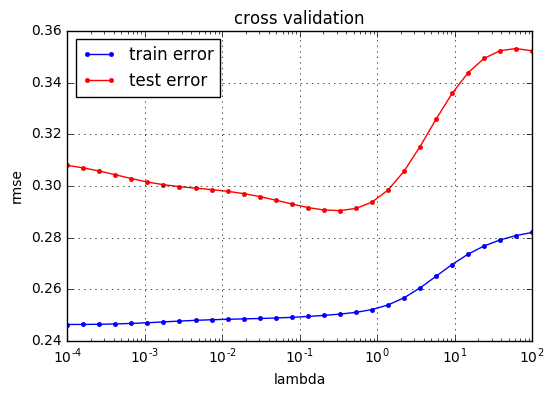

In [19]:
def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 2, 30)
#     y,x = data_load()
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    mse_tr = []
    mse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation:
    # ***************************************************
    for lamb in lambdas:
        _mse_tr = []
        _mse_te = []
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation(y,x,k_indices,k,lamb,degree, rmse=True)
            _mse_tr += [loss_tr]
            _mse_te += [loss_te]
        avg_tr = np.average(_mse_tr)
        avg_te = np.average(_mse_te)
        mse_tr += [avg_tr]
        mse_te += [avg_te]

    cross_validation_visualization(lambdas, mse_tr, mse_te)
    print(mse_tr, mse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

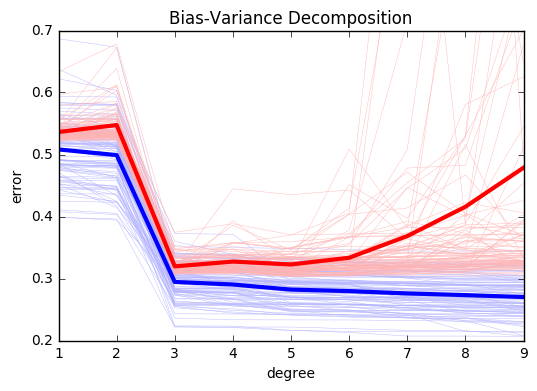

In [26]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    weight = np.linalg.solve(np.dot(tx.T,tx), np.dot(tx.T,y))
    return compute_mse(y,tx, weight),weight

from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance(function, x, weight, variance_e):
    '''
    For linear model bias-variance calculation. The dimension is len(weight)
    :param y:
    :param x:
    :param weight: beta of linear model
    :param function:
    :param variance_e:
    :return:
    '''
    y = function(x[:,1])
    # N = len(x)
    # res = np.dot(x, weight)
    # error = variance_e * (len(weight) / N) + np.sum( (y - np.dot(x, weight)) **2 )/ N
    # return compute_rmse(error)
    return compute_rmse(compute_mse(y,x,weight))

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)

    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))

    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        train_x, train_y, test_x, test_y = split_data(x,y,ratio_train,seed)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        for ind_degree, degree in enumerate(degrees):
            # Use least square
            x_tr = build_poly(train_x, degree)
            x_te = build_poly(test_x, degree)
            mse, weight = least_squares(train_y, x_tr)
#             rmse_tr[index_seed][ind_degree] = bias_variance(np.sin, x_tr, weight, 1)
#             rmse_te[index_seed][ind_degree] = bias_variance(np.sin, x_te, weight, 1)
            rmse_tr[index_seed][ind_degree] = compute_rmse(compute_mse(train_y, x_tr, weight))
            rmse_te[index_seed][ind_degree] =compute_rmse(compute_mse(test_y, x_te, weight))

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)


bias_variance_demo()